# Setup

### Imports

In [155]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Activation Functions

In [156]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def heaviside(z):
    return (z >= 0).astype(z.dtype)

# Image Classifier

### Importing Dataset and Splitting Into Test and Train

In [157]:
X_train_full = np.load('./datasets/employees/smiley_X.npy') 
X_test = X_train_full
y_train_full = np.load('./datasets/employees/smiley_y.npy').astype(int)
y_test = y_train_full

X_valid, X_train = X_train_full[:72], X_train_full[72:]
y_valid, y_train = y_train_full[:72], y_train_full[72:]
X_test = X_test

class_names = ["Happy", "Sad"]

Saving figure fashion_mnist_plot


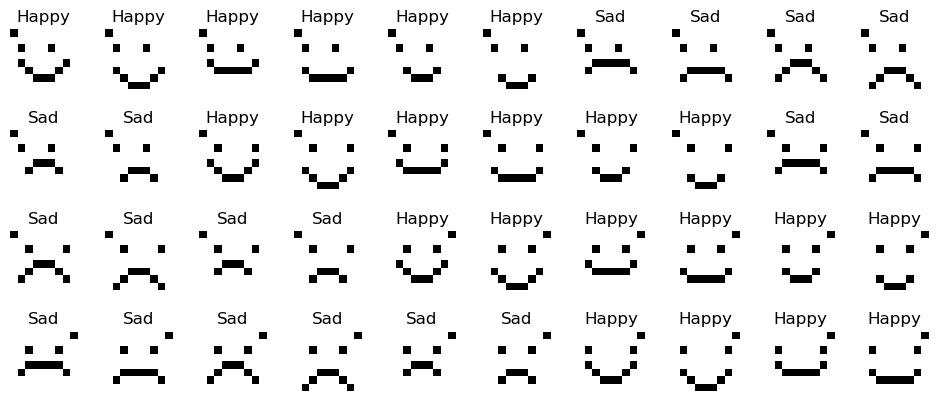

In [158]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Making the Models

In [159]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

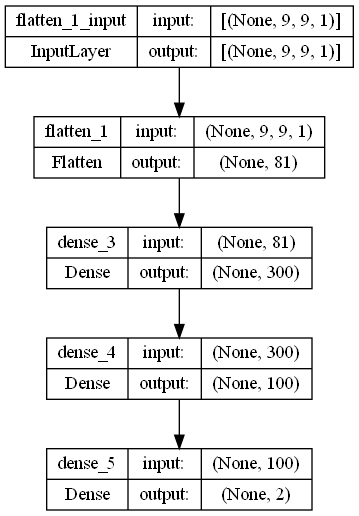

In [160]:
keras.utils.plot_model(model, "mlp_model.png", show_shapes=True)

In [161]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [162]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 1s 153ms/step - loss: 0.6695 - accuracy: 0.6250 - val_loss: 0.6582 - val_accuracy: 0.7361
Epoch 2/30
3/3 [==============================] - 0s 21ms/step - loss: 0.6580 - accuracy: 0.6806 - val_loss: 0.6473 - val_accuracy: 0.8194
Epoch 3/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6447 - accuracy: 0.6944 - val_loss: 0.6358 - val_accuracy: 0.7917
Epoch 4/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6326 - accuracy: 0.7778 - val_loss: 0.6252 - val_accuracy: 0.8611
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 0.6213 - accuracy: 0.8472 - val_loss: 0.6149 - val_accuracy: 0.8750
Epoch 6/30
3/3 [==============================] - 0s 21ms/step - loss: 0.6104 - accuracy: 0.8611 - val_loss: 0.6052 - val_accuracy: 0.9028
Epoch 7/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6003 - accuracy: 0.9306 - val_loss: 0.5950 - val_accuracy: 0.9167
Epoch 8/30
3/3 [==========

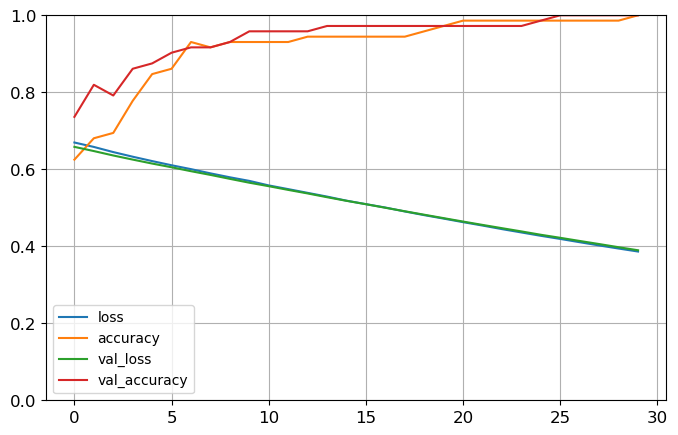

In [163]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [164]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 1.0000


[0.38451868295669556, 1.0]

# Hyperparameter Experimentation

In [165]:
Models = [
    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")])),

    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(500, activation="sigmoid"),
    keras.layers.Dense(50, activation="sigmoid"),
    keras.layers.Dense(2, activation="softmax")])),

    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")])),
]

In [166]:
history = []
for model in Models:
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history.append(model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid)))

Epoch 1/100
3/3 [==============================] - 1s 142ms/step - loss: 0.6549 - accuracy: 0.5833 - val_loss: 0.6454 - val_accuracy: 0.8472
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6451 - accuracy: 0.6944 - val_loss: 0.6369 - val_accuracy: 0.8750
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6357 - accuracy: 0.8194 - val_loss: 0.6281 - val_accuracy: 0.8750
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6260 - accuracy: 0.8333 - val_loss: 0.6195 - val_accuracy: 0.9028
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6170 - accuracy: 0.8889 - val_loss: 0.6108 - val_accuracy: 0.9167
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6075 - accuracy: 0.9028 - val_loss: 0.6024 - val_accuracy: 0.9444
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.5982 - accuracy: 0.9306 - val_loss: 0.5938 - val_accuracy: 0.9444
Epoch 8/100
3/3 [==

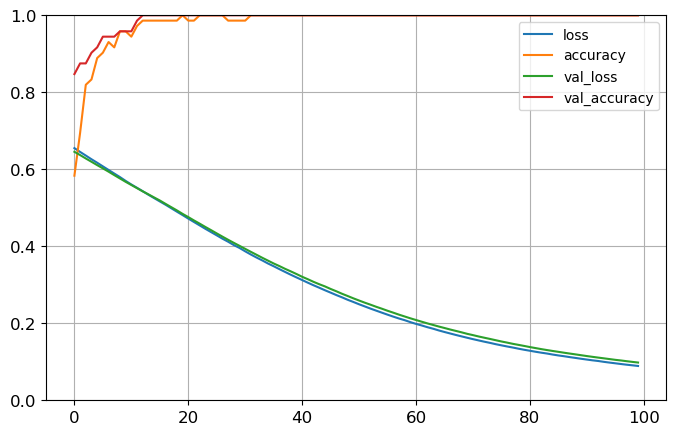

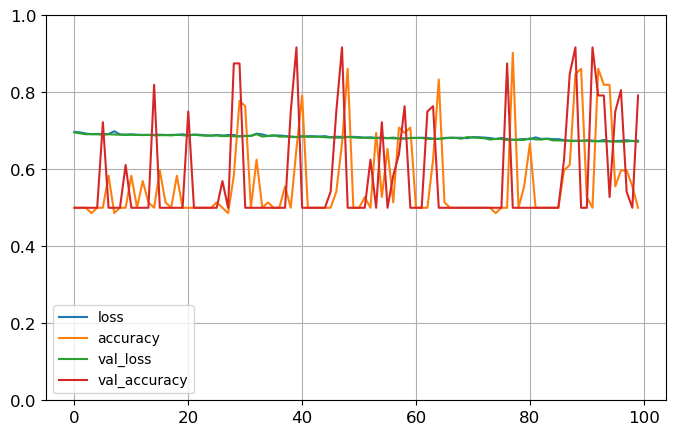

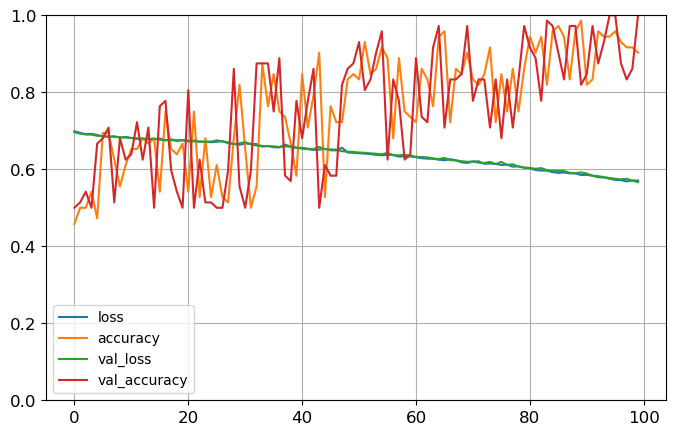

In [167]:
for hist in history:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Experimenting with 3 different classifiers using training and testing sets

### 50/50 Train Test Split

Epoch 1/100
2/2 [==============================] - 1s 292ms/step - loss: 0.6753 - accuracy: 0.5556 - val_loss: 0.6681 - val_accuracy: 0.5556
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6661 - accuracy: 0.6111 - val_loss: 0.6607 - val_accuracy: 0.6111
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6568 - accuracy: 0.6111 - val_loss: 0.6524 - val_accuracy: 0.7500
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6472 - accuracy: 0.7222 - val_loss: 0.6459 - val_accuracy: 0.8333
Epoch 5/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6399 - accuracy: 0.7500 - val_loss: 0.6388 - val_accuracy: 0.8611
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6317 - accuracy: 0.7778 - val_loss: 0.6327 - val_accuracy: 0.8611
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6228 - accuracy: 0.8056 - val_loss: 0.6253 - val_accuracy: 0.8889
Epoch 8/100
2/2 [==

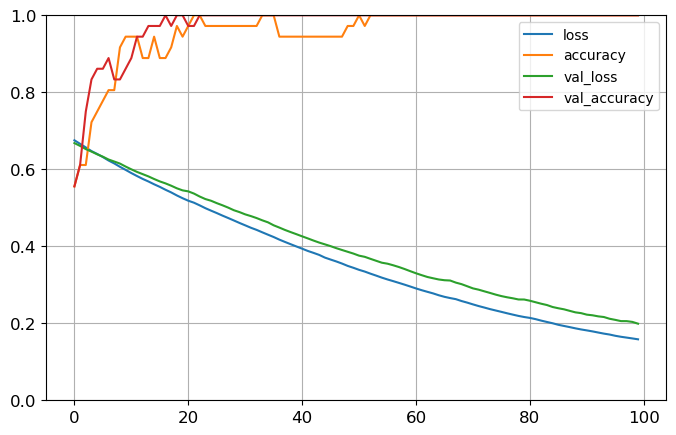

3/3 [==============================] - 0s 3ms/step - loss: 0.1990 - accuracy: 1.0000


[0.19903038442134857, 1.0]

In [168]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

X_test1, X_train1 = X_train_full[:72], X_train_full[72:]
y_test1, y_train1 = y_train_full[:72], y_train_full[72:]
X_valid1, X_train1 = X_train1[:36], X_train1[36:]
y_valid1, y_train1 = y_train1[:36], y_train1[36:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train1, y_train1, epochs=100, validation_data=(X_valid1, y_valid1)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test1, y_test1)

### 70/30 Train Test Split

Epoch 1/100
2/2 [==============================] - 1s 283ms/step - loss: 0.6399 - accuracy: 0.6078 - val_loss: 0.6331 - val_accuracy: 0.6400
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 0.6320 - accuracy: 0.6078 - val_loss: 0.6261 - val_accuracy: 0.7200
Epoch 3/100
2/2 [==============================] - 0s 38ms/step - loss: 0.6239 - accuracy: 0.6667 - val_loss: 0.6191 - val_accuracy: 0.7600
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6158 - accuracy: 0.6667 - val_loss: 0.6126 - val_accuracy: 0.8000
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6081 - accuracy: 0.6863 - val_loss: 0.6060 - val_accuracy: 0.8200
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6012 - accuracy: 0.7059 - val_loss: 0.5996 - val_accuracy: 0.8400
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 0.5932 - accuracy: 0.7451 - val_loss: 0.5932 - val_accuracy: 0.8400
Epoch 8/100
2/2 [==

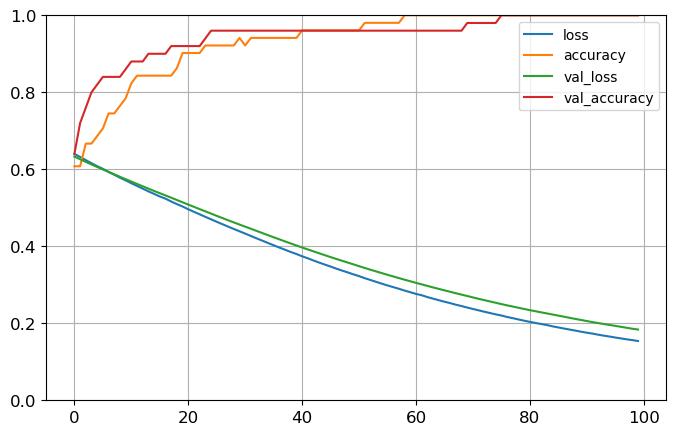

2/2 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 1.0000


[0.18512743711471558, 1.0]

In [169]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

X_test2, X_train2 = X_train_full[:43], X_train_full[43:]
y_test2, y_train2 = y_train_full[:43], y_train_full[43:]
X_valid2, X_train2 = X_train2[:50], X_train2[50:]
y_valid2, y_train2 = y_train2[:50], y_train2[50:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train2, y_train2, epochs=100, validation_data=(X_valid2, y_valid2)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test2, y_test2)

### 40/60 Train Test Split

Epoch 1/100
1/1 [==============================] - 1s 638ms/step - loss: 0.9995 - accuracy: 0.5862 - val_loss: 1.0709 - val_accuracy: 0.4483
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 0.9856 - accuracy: 0.5862 - val_loss: 1.0590 - val_accuracy: 0.4483
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.9720 - accuracy: 0.5862 - val_loss: 1.0475 - val_accuracy: 0.4483
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 0.9590 - accuracy: 0.5862 - val_loss: 1.0363 - val_accuracy: 0.4483
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 0.9464 - accuracy: 0.5862 - val_loss: 1.0255 - val_accuracy: 0.4483
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.9342 - accuracy: 0.5862 - val_loss: 1.0151 - val_accuracy: 0.4483
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 0.9224 - accuracy: 0.5862 - val_loss: 1.0048 - val_accuracy: 0.4483
Epoch 8/100
1/1 [==

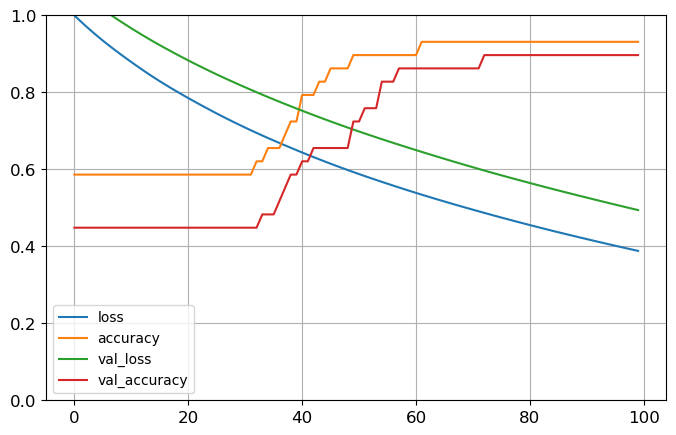

3/3 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.9186


[0.4936356246471405, 0.9186046719551086]

In [170]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

X_test3, X_train3 = X_train_full[:86], X_train_full[86:]
y_test3, y_train3 = y_train_full[:86], y_train_full[86:]
X_valid3, X_train3 = X_train3[:29], X_train3[29:]
y_valid3, y_train3 = y_train3[:29], y_train3[29:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train3, y_train3, epochs=100, validation_data=(X_valid3, y_valid3)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test3, y_test3)

# Convolution Neural Networks

### Building an ANN

In [ ]:
keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

X_test, X_train = X_train_full[:72], X_train_full[72:]
y_test, y_train = y_train_full[:72], y_train_full[72:]
X_valid, X_train = X_train1[:36], X_train1[36:]
y_valid, y_train = y_train1[:36], y_train1[36:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

### Building a CNN

In [ ]:
x_train= X_train.reshape(60000, 28, 28, 1)
x_test = X_test.reshape(10000, 28, 28, 1)
x_train.shape #28*28=784

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

In [ ]:
classifications = model.predict(x_test)

In [ ]:
print(classifications[3])

In [ ]:
np.argmax(classifications[3])

In [ ]:
np.max(classifications[3])

In [ ]:
class_names[np.argmax(classifications[3])]

In [ ]:
plt.imshow(x_test[3].reshape(28,28))
plt.colorbar()
plt.grid(False)

In [ ]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)